<a href="https://colab.research.google.com/github/cb532/rental_price_prediction_and_market_analysis/blob/main/Rental_Price_Prediction_and_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')
rental = pd.read_csv('gdrive/My Drive/Colab Notebooks/dsc101/data/apartment-rental-final.csv', encoding = 'cp1252')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Introduction

## What is our data

The project revolves around a dataset, "apartments-rental-final.csv" featuring details on 10,000 apartments for rent across the United States. This comprehensive dataset encompasses diverse information, including but not limited to location, amenities, bedrooms, bathrooms, and pricing. Each observation represents a unique rental opportunity, providing a rich source for analysis and exploration.

## What I'll be doing

Our exploration involves delving into the intricacies of the dataset to extract meaningful insights and address key questions. The primary objectives include developing a model for predicting monthly rent and uncovering distinct market segments. The analysis will commence with a detailed data description, followed by targeted exploratory data analysis (EDA) to reveal patterns and relationships. The subsequent steps involve data preparation to refine the dataset for modeling and the construction of a predictive model for monthly rent.

The project's structure comprises three main sections:

1. Data Description: A comprehensive examination of the dataset, elucidating variable names, data types, and overall structure.

2. Price Prediction: Developing a model to predict monthly rent, incorporating EDA, data preparation, and model construction.

3. Market Determination: Uncovering distinct market segments, including geographic and non-geographic characteristics.

Through these tasks, the project aims to provide a nuanced understanding of the dataset and contribute valuable insights to the real estate market and the affects other variables have on it.

#Data Description

## Data context


The dataset, "apartments-rental-final.csv" encompasses information about 10,000 apartments available for rent across the United States. This diverse and expansive dataset includes crucial details such as location, amenities, bedroom and bathroom counts, and pricing, providing a comprehensive view of the rental housing market.


## Data information

There are a total of 23 variables, as well as 10,000 observations. Note that not every variable has a value for each observation.

## Variable Information

*  Unnamed:0
  * This variable is simply an index, counting from 1 to 10,000
  * int64 (whole numbers)
  * 10,000 values
*  id
  * This variable is an id that is 10-digit id unique to each listing
  * int64 (whole numbers)
  * 10,000 values
*  category
  * This variable is simply the same for each listing, which is housing/rent/apartment
  * object (string)
  * 10,000 values
*  title
  * This variable is the title of the listing, with varying naming structures
  * object (string)
  * 10,000 values
*  body
  * This variable is the body text of the listing, with varying information and often including the information of other variables such as address, price, amenities, etc.
  * object (string)
  * 10,000 values
*  amenities
  * This variable is for the amentities of the listing, such as appliances, recreation, etc.
  * object (string)
  * 6,451 values
*  bathrooms
  * This variable contains the amount of bathrooms
  * float64 (decimal numbers)
  * 9,443 values
*  bedrooms
  * This variable contains the amount of bedrooms
  * float64 (decimal numbers)
  * 9,993 values
*  currency
  * This variable contains the currency for payment
  * object (string)
  * 10,000 values
*  fee
  * This variable contains the answer to if there is a fee or not (yes or no)
  * object (string)
  * 10,000 values
*  has_photo
  * This variable tells us if the listing has a photo or not
  * object (string)
  * 10,000 values
*  pets_allowed
  * This variable tells us if pets and which pets are allowed
  * object (string)
  * 8,252 values
*  price
  * This variables tells us the price of the listing in plain number format
  * float64 (decimal numbers)
  * 9,973 values
*  price_display
  * This variable is contains a more readable version of the price with comma's and dollar signs.
  * object (string)
  * 10,000 values
*  price_type
  * This variable tells us the payment schedule
  * object (string)
  * 10,000 values
*  square_feet
  * This variable tells us the square footage of the listing
  * float64 (decimal numbers)
  * 9,820 values
*  address
  * This variable tells us the address of the listing
  * object (string)
  * 6,673 values
*  cityname
  * This variable tells us the city the listing is located in
  * object (string)
  * 9,923 values
*  state
  * This variable tells us the state the listing is located in
  * object (string)
  * 9,916 values
*  latitude
  * This variable gives us the latitude location of the listing
  * float64 (decimal numbers)
  * 9,972 values
*  longitude
  * This variable gives us the longitude location of the listing
  * float64 (decimal numbers)
  * 9,972 values
*  source
  * This variable tells us the source of the listing, such as which website
  * object (string)
  * 3,674 values
*  time
  * this variable tells us the time of the listing, in unix format
  * int64 (whole numbers)
  * 10,000 values

# Price Prediction

In this section we are going to develop a model to predict the monthly rent for apartments. I will be doing this using regression.

## Exploratory Data Analysis

### Descriptive Statistics on Rental Prices

We first need to get some descriptive statistics on our target variable, rental prices.

In [67]:
# Descriptive statistics on rental prices
rental_price_stats = rental['price'].describe()

# Print the result
print(rental_price_stats)

count     9973.000000
mean      1486.470370
std       1077.577105
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64


In these statistics we get a couple interesting points. First, we are missing the price from 27 listings, we will try to solve this with in our next step data preperation. We find also find out that the average rent price is \$1,486 with a standard deviation of \$1,077, the minimum is \$200, and the maximum is $52,500.

Below is a boxplot of rental prices, to help visualize outliers and distribution.

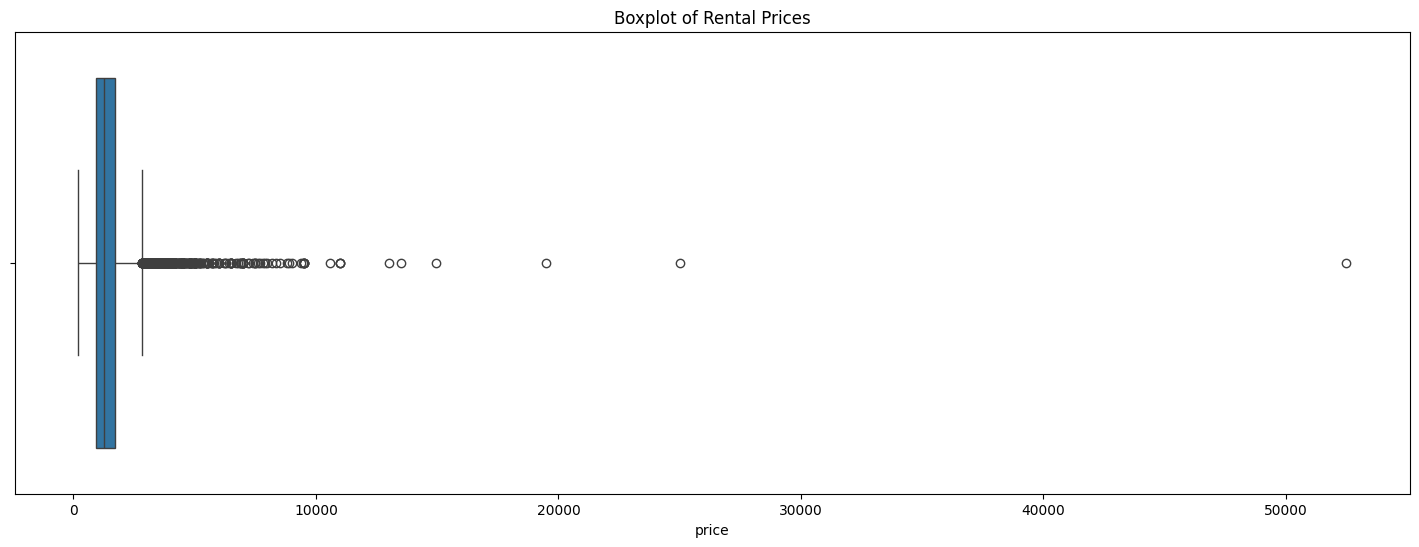

In [68]:
plt.figure(figsize=(18, 6))
sns.boxplot(x=rental['price'])
plt.title('Boxplot of Rental Prices')
plt.show()

We can see that for the most part, they are consolidated towards the average but with outliers occupying the high ends, with our maximum being a large outlier.

It is clearly right skewed, below we'll calculate the exact amount

In [69]:
skewness = rental['price'].skew()
print(f'Skewness of Rental Prices: {skewness}')

Skewness of Rental Prices: 14.362910955262093


Now I want to look at correlations with other variables. For now, only numeric variables.

In [70]:
correlation_matrix = rental.corr(numeric_only=True)
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

price          1.000000
bathrooms      0.409499
square_feet    0.388464
Unnamed: 0     0.335666
bedrooms       0.306529
latitude       0.015342
id            -0.021593
time          -0.022300
longitude     -0.183856
Name: price, dtype: float64


This tells us that the price increases with and increase of bathrooms, square_feet, and bedrooms. These variables are likely correlated to each other, so I'll double check that now.

In [71]:
correlation_matrix = rental[['bathrooms', 'square_feet', 'bedrooms']].corr()

print(correlation_matrix)

             bathrooms  square_feet  bedrooms
bathrooms      1.00000     0.797150  0.704860
square_feet    0.79715     1.000000  0.586787
bedrooms       0.70486     0.586787  1.000000


As suspected they are heavily correlated, with square_feet and bathrooms being the highest correlation, follow by bathrooms and bedroom, and lastly bedrooms and square_feet. If we don't want our model to be too heavily weighted by size, we may want to not use all of these in our model.

A very low positive correlation with latitude suggests a weak relationship. It's not meaningful for interpretation as latitude alone may not be a strong predictor of rental prices.

Longitude on the other hand have a negative correlation of -0.18 indicating a moderate negative relationship between longitude and rental prices. This suggests that, on average, listings with higher longitude (moving west) tend to have lower rental prices.

We can see that time has a very low correlation, but I want to visualize this better as I think we can get more information out of time.

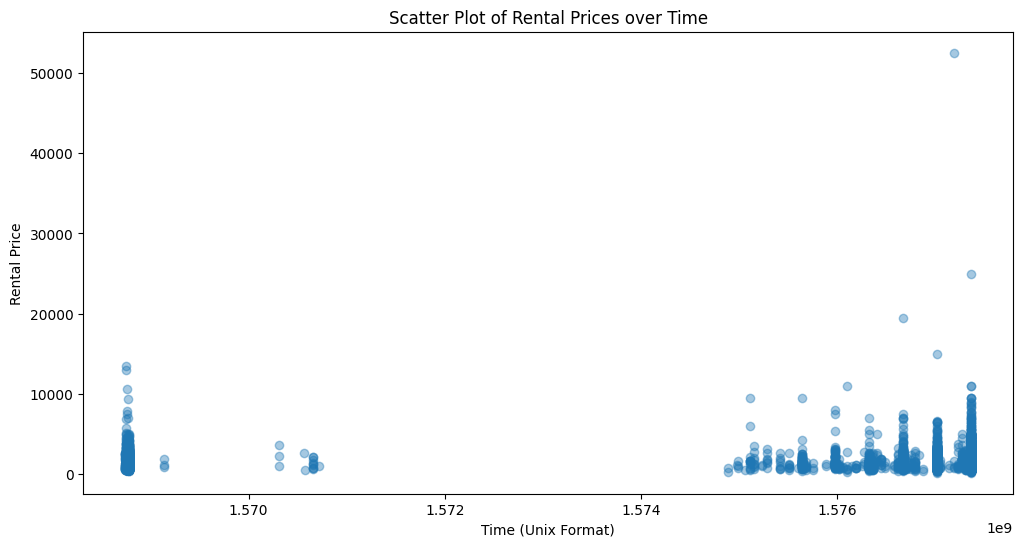

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(rental['time'], rental['price'], alpha=0.4)
plt.title('Scatter Plot of Rental Prices over Time')
plt.xlabel('Time (Unix Format)')
plt.ylabel('Rental Price')
plt.show()

As you can see, there seems to be a gap in listing dates, and these times in non unix format are actually only September to December 2019, so only a 3 month span.

Important to note that both ID and unnamed: 0 are likely useless for our analysis and model, as they are both indexing variables.


I am going to ignore most categorical variables for now, as I am going to use regression for this price prediction and will look at things like geography further on. I will still look at things that I can translate into yes/no answers that I could easily translate to numbers.

First I want to see if having a photo has a significant impact on the price.

In [73]:
# Calculate the average price for each 'has_photo' category
average_price_per_photo = rental.groupby('has_photo')['price'].mean()

# Display the result
print("Average Price per 'has_photo' Category:")
print(average_price_per_photo)

Average Price per 'has_photo' Category:
has_photo
No           1586.516304
Thumbnail    1483.197321
Yes          1498.259669
Name: price, dtype: float64


Oddly enough, having a photo means there is a lower price on average. I don't think this variable holds any weight when determining rent price though.

Lastly lets look at if pets are allowed has significant impact on price.

In [74]:
# Replace any missing values in the 'pets_allowed' column with a placeholder
rental['pets_allowed'].fillna('Not Specified', inplace=True)

# Calculate both the average price and the count for each 'pets_allowed' category
result_per_pets = rental.groupby('pets_allowed')['price'].agg(['mean', 'count'])

# Display the result
print("Average Price and Count per 'pets_allowed' Category:")
print(result_per_pets)

Average Price and Count per 'pets_allowed' Category:
                      mean  count
pets_allowed                     
Cats           1359.325052    483
Cats,Dogs      1443.736276   5210
Dogs           2063.178862    123
Not Specified  1537.738273   4157


There seems to be an interesting correlation here, dogs is significantly higher. I'll try to utilize this in my model.

The rest of the variables I don't expect to give us any significant information.

Category, Currency, and Fee, all have the same value for each listing, so are useless.

Both title and body are unique to the listing and most valuable data from it will already be from other variables like square feet.

Price_display is just a different format for price.

Price_type we may need to use to fix some of the prices in the next section, but does not give us information for predicting price.

This covers all the variables in relation with price, now we move onto data preperation.

## Data Preperation

Now that we know so much about the price statistics and correlations, lets work on cleaning and preparing the data for our model. I am going to be using a linear regression model to determine price.

### Dropping Irrelevant Variables

We determined in the previous section that unnamed:0, id, category, title, body, currency, fee, has_photo, price_display, address, source, are all not going to be used in our model as they don't tell us enough about price.

Since I will be using a regression model, I am also going to be dropping non-numeric variables (besides pets_allowed, as I'll one-hot encode this later).

In [75]:
# Create a copy of the 'rental' dataframe
rental_copy = rental.copy()

# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'id', 'category', 'title', 'body', 'currency', 'fee',
                   'has_photo', 'price_display', 'address', 'source', 'amenities', 'price_type', 'cityname', 'state']

# Drop the specified columns
rental_copy = rental_copy.drop(columns=columns_to_drop)

### Handling Missing Values

Now we have to handle missing data. First lets look at how many we have missing from each.

In [76]:
# Display the count of missing values for each variable in rental_copy
missing_values = rental_copy.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
bathrooms       557
bedrooms          7
pets_allowed      0
price            27
square_feet     180
latitude         28
longitude        28
time              0
dtype: int64


First thing I notice is there is 27 missing price values, but I remember there were no missing price_displays in our original data, so lets try to extract that information and fill our missing values.

In [77]:
# Delete the dollar sign and comma, then convert to numeric
rental_copy['price'] = pd.to_numeric(rental['price_display'].str.replace('[\$,]', '', regex=True), errors='coerce')

We are left with two missing values, because of our two prices that have odd weekly formats. By looking in the original rental dataframe, I see that the first one says it is 1560 weekly despite being 200 square feet, this must be an error. The second one is displayed as $275 monthly|weekly, which doesn't make very much sense and can be assumed meant weekly. In the title and body there are no clues to the actual pricing, so I will decide to drop both rows. This is also good because it deals with us having to translate prices to monthly format.

In [78]:
# Drop rows with missing 'price'
rental_copy = rental_copy.dropna(subset=['price'])

For the rest of our numeric missing values, we will be doing imputations. First lets check skews, to tell whether we will use median or average for each.

In [79]:
from scipy.stats import skew

numeric_variables_with_missing = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']

# Calculate skewness for each numeric variable with missing values
skewness_of_missing = rental_copy[numeric_variables_with_missing].apply(lambda x: skew(x.dropna()))

# Display the skewness values
print("Skewness of Numeric Variables with Missing Values:")
print(skewness_of_missing)

Skewness of Numeric Variables with Missing Values:
bathrooms       2.031808
bedrooms        1.173330
square_feet    23.157778
latitude        0.281159
longitude      -0.667446
dtype: float64








Since bathrooms, bedrooms, and square_feet all have a skew, we will use median. Latitude and longitude have a lower skew, so I'll decide what to do with those missing values after.

In [80]:
# Calculate the median for each column
median_bathrooms = rental_copy['bathrooms'].median()
median_bedrooms = rental_copy['bedrooms'].median()
median_square_feet = rental_copy['square_feet'].median()

# Fill missing values with the calculated medians
rental_copy['bathrooms'].fillna(median_bathrooms, inplace=True)
rental_copy['bedrooms'].fillna(median_bedrooms, inplace=True)
rental_copy['square_feet'].fillna(median_square_feet, inplace=True)

<ipython-input-80-e7ca019a97db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_copy['bathrooms'].fillna(median_bathrooms, inplace=True)
<ipython-input-80-e7ca019a97db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_copy['bedrooms'].fillna(median_bedrooms, inplace=True)
<ipython-input-80-e7ca019a97db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_copy['square_feet'].fillna(median_square_feet, inplace=True)


Now all that is left is latitude and longitude. There isn't a very good way to impute these, and there is only 28 out of 10,000, I am just going to drop them for our regression model.

In [81]:
rental_copy = rental_copy.dropna(subset=['latitude', 'longitude'])

Now checking to see if there are no missing values

In [82]:
# Display the count of missing values for each variable in rental_copy
missing_values = rental_copy.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
bathrooms       0
bedrooms        0
pets_allowed    0
price           0
square_feet     0
latitude        0
longitude       0
time            0
dtype: int64


Now lets move onto feature engineering for our model!

### Feature Engineering

For our feature engineering, I would like to translate pets_allowed into a numerical format for regression. I will simply set the value equal to 0, if they aren't, and 1 if they are.

In [83]:
# Replace 'None' and 'NA' values with an indicator for no pets allowed
rental_copy['pets_allowed'] = rental_copy['pets_allowed'].replace(['None', 'NA'], 0)

# Replace other values with an indicator for pets allowed
rental_copy['pets_allowed'] = rental_copy['pets_allowed'].apply(lambda x: 1 if isinstance(x, str) else x)

I am also going to drop the two heavy outliers in price and squared feet, as regression models can be very heavily impacted by outliers and they are so rare.

In [84]:
# Find the index of the row with the highest price
max_price_index = rental_copy['price'].idxmax()

# Drop the row with the highest price
rental_copy = rental_copy.drop(index=max_price_index)

In [85]:
# Find the index of the row with the highest price
max_square_feet_index = rental_copy['square_feet'].idxmax()

# Drop the row with the highest price
rental_copy = rental_copy.drop(index=max_square_feet_index)


In [86]:
display(rental_copy)

,bathrooms,bedrooms,pets_allowed,price,square_feet,latitude,longitude,time
0,1.0,0.0,1,790.0,101.0,38.9057,-76.9861,1577359415
1,1.0,1.0,1,425.0,106.0,37.9680,-87.6621,1577017063
2,1.0,0.0,1,1390.0,107.0,38.8910,-77.0816,1577359410
3,1.0,0.0,1,925.0,116.0,47.6160,-122.3275,1576667743
4,1.0,0.0,1,880.0,125.0,38.8738,-77.1055,1577359401
...,...,...,...,...,...,...,...,...
9994,4.0,6.0,1,3000.0,5921.0,37.0835,-113.5823,1577017103
9995,4.0,5.0,1,6000.0,6300.0,44.9000,-93.3233,1575112975
9996,8.0,6.0,1,25000.0,8716.0,34.4331,-119.6331,1577360419
9997,8.5,6.0,1,11000.0,11318.0,39.0287,-77.2409,1577360560


## Model Construction

Now that everything is set for our model, lets create it.

### Building the Predictive Model

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop the target variable 'price'
X = rental_copy.drop(['price'], axis=1)

# Target variable
y = rental_copy['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 585849.0223300855
R-squared: 0.3305321922059644


It is a good start, but I am not happy with 0.33 r squared. Lets try polynomial regression.

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = polyreg.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly}')

Mean Squared Error (Polynomial Regression): 523601.3714820327
R-squared (Polynomial Regression): 0.4016645091770332


0.4 is a big improvement, still not in the range I am looking for. Lets try other degrees.

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
polyreg = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = polyreg.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly}')

Mean Squared Error (Polynomial Regression): 528398.6586893806
R-squared (Polynomial Regression): 0.39618250062594274


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
polyreg = make_pipeline(PolynomialFeatures(4), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = polyreg.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly}')

Mean Squared Error (Polynomial Regression): 532245.9189884746
R-squared (Polynomial Regression): 0.39178611722292267


The R-squared got lower with higher degrees, so I believe the second degree will be the highest. I am not happy with 0.4, so lets try a better regression model

In [91]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'rental_copy' is your DataFrame
# Drop the target variable 'price' and any other non-numeric variables
X = rental_copy.drop(['price'], axis=1)

# Target variable
y = rental_copy['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 308392.18019426835
R-squared: 0.7013002703019038


I am very happy with 0.71, the gradient boosting of of XGBoost seems to be perfect for our large dataset with many variables.

### Model Description

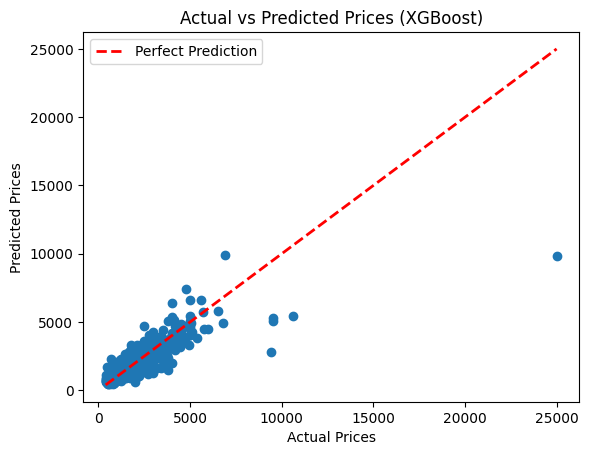

In [92]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In the visualization above, we are examining the performance of our predictive model for rental prices. The x-axis represents the actual prices of rental properties, while the y-axis displays the prices predicted by our model.

Ideally, a perfect prediction would align precisely with the red dotted line. However, due to the complexity of real-world data, our predictions deviate from this line. Each point on the plot corresponds to a specific rental property, and their distribution provides insights into the accuracy of our model.

In summary, this visualization allows us to assess how well our model predicts rental prices, offering a valuable tool for understanding its strengths and areas for improvement.

# Market Determination

In this section we are going to build two more models. One based on geography, and one based on date.

## Based on Geography

### Exploratory Data Analysis

First we will make a new copy of our original dataset

In [93]:
geo_rent = rental.copy()

#### Descriptive Statistics of Geography based on rent

First I will make a box and whisker chart to see the rent in different states.

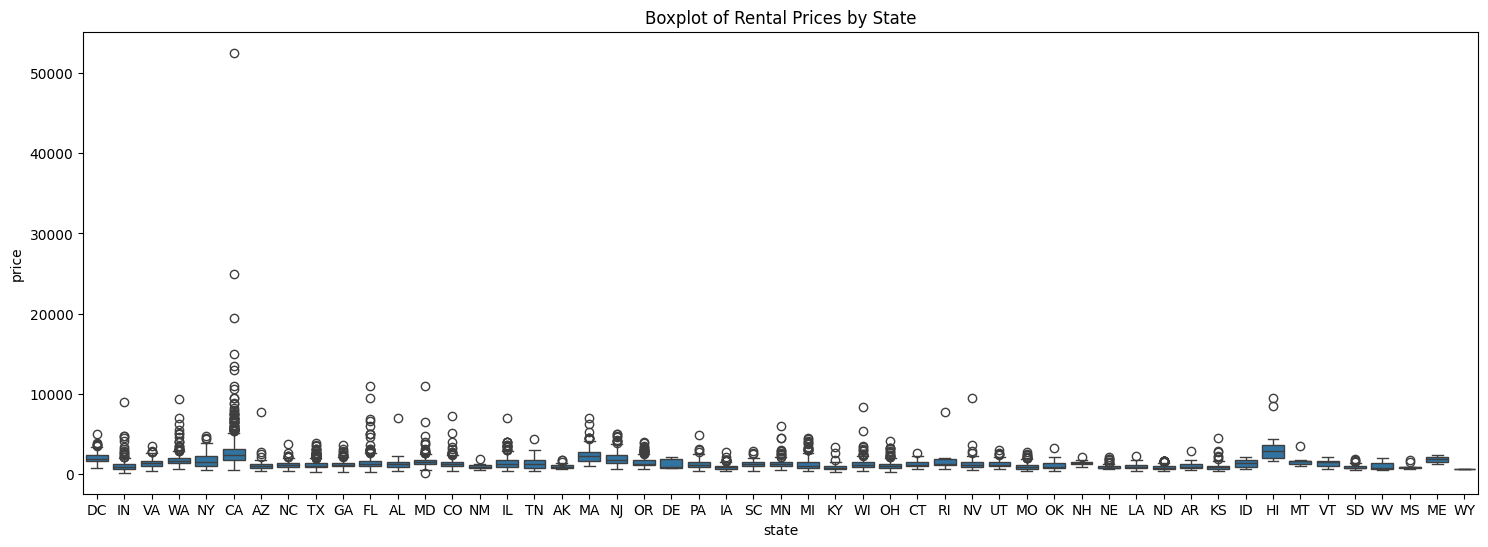

In [94]:
# Create a boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(x='state', y='price', data=geo_rent)
plt.title('Boxplot of Rental Prices by State')
plt.show()

Here you can see california being fairly unique, it has a higher average and also includes most of our heavy skewing prices and the largest outlier. Some states like Hawaii and Massachusetts also stand out for being on the higher end, and some like Wyoming stand out for being on the lower end.

Now I want to calculate how many datapoints are in each state, as it will vary a lot. I also will show the average rent price too.

In [95]:
state_stats = geo_rent.groupby('state')['price'].agg(['count', 'mean'])
print(state_stats)

       count         mean
state                    
AK        44  1011.636364
AL        55  1353.018182
AR        55  1032.000000
AZ       125  1148.704000
CA       951  2827.812829
CO       317  1370.132492
CT        98  1283.122449
DC        79  2107.594937
DE         5  1296.800000
FL       335  1527.540299
GA       369  1264.512195
HI        12  3689.083333
IA       179   941.720670
ID        21  1372.666667
IL       282  1459.368794
IN       238  1110.466387
KS        83  1014.096386
KY        40   948.775000
LA        65  1029.123077
MA       167  2378.946108
MD       421  1587.187648
ME         2  1862.500000
MI       176  1306.426136
MN       221  1366.063348
MO       239   983.958159
MS         9   986.111111
MT         7  1755.714286
NC       438  1193.780822
ND       113   938.442478
NE       104   940.634615
NH        70  1392.585714
NJ       383  1960.227154
NM        14   963.500000
NV       120  1343.866667
NY        71  1739.183099
OH       321  1118.881620
OK       178

As you can see, some states have lots of listings, and some have barely any.

Next we'll look at cities. With how many cities there are, it is not realistic to see a relationship between each city and price. Instead we'll look at the 10 with highest average rent, and 10 with lowest average rent.

Now I want to look at cities. It is not logical to look at every single city, there would be way too many, but instead lets look at the 10 highest and 10 lowest.

In [96]:
# Calculate the average rental price for each city
average_prices_by_city = rental.groupby('cityname')['price'].mean()

# Select the top 10 cities with the highest average rental prices
top_10_high_prices = average_prices_by_city.nlargest(10)

# Select the top 10 cities with the lowest average rental prices
top_10_low_prices = average_prices_by_city.nsmallest(10)

# Display the lists of cities
print("Top 10 cities with the highest average rental prices:")
print(top_10_high_prices)

print("\nTop 10 cities with the lowest average rental prices:")
print(top_10_low_prices)

Top 10 cities with the highest average rental prices:
cityname
Barstow         52500.000000
Montecito       16100.000000
Key Biscayne     9500.000000
Menlo Park       8200.000000
Hollywood        7283.500000
Centerville      7000.000000
Kailua           6716.666667
Brookline        6300.000000
Potomac          5900.000000
Coronado         5512.500000
Name: price, dtype: float64

Top 10 cities with the lowest average rental prices:
cityname
Mount Airy       200.0
Lakeland         275.0
Michigan City    288.0
Central City     350.0
Edgerton         386.0
Red Oak          395.0
Niles            420.0
Youngstown       435.0
El Dorado        450.0
West Fargo       450.0
Name: price, dtype: float64


This is great insight into the most and least expensive cities to rent in.

 Lets now look at latitude and longitude.

In [97]:
latitude_stats = geo_rent['latitude'].describe()
longitude_stats = geo_rent['longitude'].describe()

print("Latitude Descriptive Statistics:")
print(latitude_stats)

print("\nLongitude Descriptive Statistics:")
print(longitude_stats)

Latitude Descriptive Statistics:
count    9972.000000
mean       37.696052
std         5.495228
min        21.315500
25%        33.686525
50%        38.809800
75%        41.349800
max        61.594000
Name: latitude, dtype: float64

Longitude Descriptive Statistics:
count    9972.000000
mean      -94.639496
std        15.752596
min      -158.022100
25%      -101.301700
50%       -93.651600
75%       -82.183200
max       -70.191600
Name: longitude, dtype: float64


Very expected since all listings are from USA. Lets move on to data preperation

### Data Preperation

#### Dropping Irrelevant Variables

In this model I want to make a model based solely off geographical variables and price. To start, we are going to drop every variable that isn't geographical or price.

In [98]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms', 'currency', 'fee',
                   'has_photo', 'pets_allowed', 'square_feet', 'price_display', 'address', 'source', 'amenities', 'price_type', 'time']

# Drop the specified columns
geo_rent = geo_rent.drop(columns=columns_to_drop)

In [99]:
display(geo_rent)

,price,cityname,state,latitude,longitude
0,790.0,Washington,DC,38.9057,-76.9861
1,425.0,Evansville,IN,37.9680,-87.6621
2,1390.0,Arlington,VA,38.8910,-77.0816
3,925.0,Seattle,WA,47.6160,-122.3275
4,880.0,Arlington,VA,38.8738,-77.1055
...,...,...,...,...,...
9995,6000.0,Edina,MN,44.9000,-93.3233
9996,25000.0,Montecito,CA,34.4331,-119.6331
9997,11000.0,Potomac,MD,39.0287,-77.2409
9998,4790.0,New York,NY,40.7716,-73.9876


#### Handling Missing Values

To start, lets fix the missing price values the same way we did in the previous model.

In [100]:
# Replace dollar sign and comma, then convert to numeric
geo_rent['price'] = pd.to_numeric(rental['price_display'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [101]:
# Drop rows with missing 'price'
geo_rent = geo_rent.dropna(subset=['price'])

Now lets look at how many missing values we have

In [102]:
# Display the count of missing values for each variable in geo_rent
missing_values = geo_rent.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
price         0
cityname     77
state        84
latitude     28
longitude    28
dtype: int64


I tried getting creative to solve some of the missing values here, but I was having trouble and since the amount missing is so low for our dataset of 10,000, I am simply going to drop them as well.

In [103]:
geo_rent = geo_rent.dropna(subset=['cityname'])
geo_rent = geo_rent.dropna(subset=['state'])
geo_rent = geo_rent.dropna(subset=['latitude'])
geo_rent = geo_rent.dropna(subset=['longitude'])

Now lets make sure we have no missing data

In [104]:
# Display the count of missing values for each variable in geo_rent
missing_values = geo_rent.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
price        0
cityname     0
state        0
latitude     0
longitude    0
dtype: int64


That's it, now lets move onto feature engineering.

#### Feature Engineering

In [105]:
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
    'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West', 'DC': 'South'
}

# Add a new 'region' column based on the mapping
geo_rent['region'] = geo_rent['state'].map(state_to_region)

# Display the updated DataFrame
display(geo_rent)

,price,cityname,state,latitude,longitude,region
0,790.0,Washington,DC,38.9057,-76.9861,South
1,425.0,Evansville,IN,37.9680,-87.6621,Midwest
2,1390.0,Arlington,VA,38.8910,-77.0816,South
3,925.0,Seattle,WA,47.6160,-122.3275,West
4,880.0,Arlington,VA,38.8738,-77.1055,South
...,...,...,...,...,...,...
9995,6000.0,Edina,MN,44.9000,-93.3233,Midwest
9996,25000.0,Montecito,CA,34.4331,-119.6331,West
9997,11000.0,Potomac,MD,39.0287,-77.2409,South
9998,4790.0,New York,NY,40.7716,-73.9876,Northeast


Lets just check to make sure this mapped them all.

In [106]:
# Display the count of missing values for each variable in geo_rent
missing_values = geo_rent.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
price        0
cityname     0
state        0
latitude     0
longitude    0
region       0
dtype: int64


Perfect, I may change the regions if I need to but for now this is okay.

### Model Construction

#### Building the Model

I am going to create a k-means clustering based off price, and sort the clusters based on price, then when I map them using latitude and longitude, I can create a map of the most and least expensive places to rent.

In [107]:
import pandas as pd
from sklearn.cluster import KMeans

X = geo_rent[['price']]

# Choose the number of clusters
k_clusters_price = 4  # Adjust the number of clusters as needed

# Apply K-Means clustering for price
kmeans_price = KMeans(n_clusters=k_clusters_price)
geo_rent['price_cluster'] = kmeans_price.fit_predict(X)

# Calculate mean price for each cluster
cluster_means = geo_rent.groupby('price_cluster')['price'].mean()

# Sort clusters based on mean price
sorted_clusters = cluster_means.sort_values().index

# Create a mapping from original cluster labels to sorted cluster labels
cluster_mapping = {cluster: i for i, cluster in enumerate(sorted_clusters)}

# Apply the new labels to 'price_cluster'
geo_rent['price_cluster_sorted'] = geo_rent['price_cluster'].map(cluster_mapping)

#### Model Description

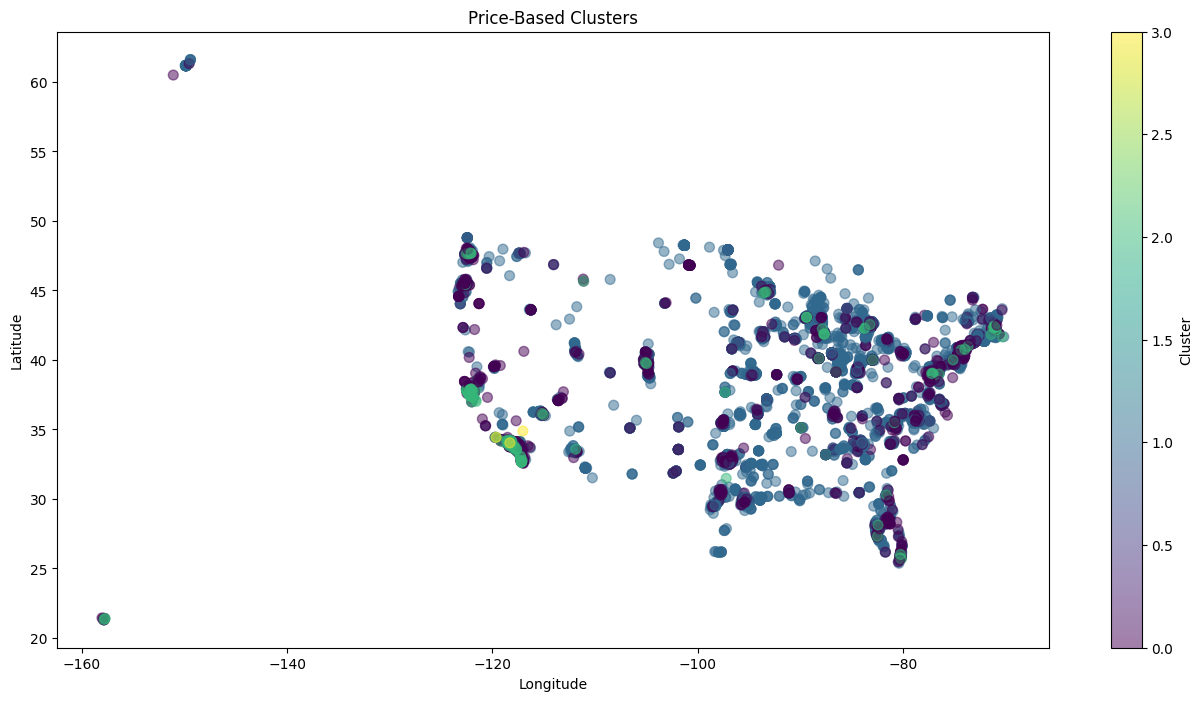

In [108]:
# Visualize the clusters with switched latitude and longitude
plt.figure(figsize=(16, 8))

# Scatter plot for price-based clusters with switched latitude and longitude
plt.scatter(geo_rent['longitude'], geo_rent['latitude'], c=geo_rent['price_cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('Price-Based Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

plt.show()

The model above creates a clustering of listings based off price, sorts them, then plots them on a graph based off longitude and latitude. Since we have so many listings, this actually creates a very clear map of the USA, and gives us great insight into the highest and lowest rent locations. It also gives us insight into where most of these rent locations are taking place, and where they are not.

You can see that the california coast is a hotspot for high rent listings, with cities like Los Angelos and San Franscisco. You can also see a hot spot around new york, boston, portland, seattle, denver, philadelphia, and orlando. These high traffics areas are often home to the headquarters of worldwide businesses, vastly increasing rent price in a small area.

## Amenities based

The next model I am going to be doing is that determines how amenities listed affects price.

### Exploratory Data Analysis

#### Descriptive Statistics of date

First we need to make another copy of our dataset.

In [109]:
am_rent = rental.copy()

Now we can look at statistics

In [110]:
# Perform descriptive statistics on the 'amenities' variable
amenities_stats = am_rent['amenities'].value_counts()

# Display the descriptive statistics
print(amenities_stats)

amenities
Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 225
Pool                                                                                                                                    171
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Clubhouse,Dishwasher,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Refrigerator                                      1
Cable or S

We can see that parking is the most listed, with dishwasher and pool being the second most. We will split all amenities up into different variables in feature engineering.

### Data Preperation

#### Dropping Irrelevant Variables

Since we are going to be doing a very basic model, simply seeing how amenities affects the price, we will drop everything besides price and amenities.

In [111]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'id', 'category', 'title', 'body', 'bathrooms', 'bedrooms', 'currency', 'fee',
                   'has_photo', 'pets_allowed', 'square_feet', 'price_display', 'address', 'source', 'price_type', 'cityname', 'state', 'latitude', 'longitude', 'time']

# Drop the specified columns
am_rent = am_rent.drop(columns=columns_to_drop)

In [112]:
display(am_rent)

,amenities,price
0,NaN,790.0
1,NaN,425.0
2,NaN,1390.0
3,NaN,925.0
4,NaN,880.0
...,...,...
9995,NaN,6000.0
9996,NaN,25000.0
9997,NaN,11000.0
9998,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",4790.0


#### Handling Missing Values

To start, lets fix the missing price values the same way we did in the previous models.

In [113]:
# Replace dollar sign and comma, then convert to numeric
am_rent['price'] = pd.to_numeric(rental['price_display'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [114]:
# Drop rows with missing 'price'
am_rent = am_rent.dropna(subset=['price'])

In [115]:
# Display the count of missing values for each variable in am_rent
missing_values = am_rent.isnull().sum()

# Display the result
print("Missing Values for Each Variable:")
print(missing_values)

Missing Values for Each Variable:
amenities    3549
price           0
dtype: int64


We have a lot of missing values for amenities, but this is no problem as we will fix this in feature engineering.

#### Feature Engineering

Here we will split all amenities up into different variables, and one hot encode them. If there is a certain amenity, it will be a 1, if there isn't, it will be a 0. If there are no amenities, all variables besides price will be 0.

In [116]:
# Split the 'amenities' into different variables and one-hot encode them
am_rent_amenities = am_rent['amenities'].str.get_dummies(sep=',')

# Concatenate the new amenity variables with the original DataFrame
am_rent = pd.concat([am_rent, am_rent_amenities], axis=1)

# Drop the original 'amenities' column
am_rent = am_rent.drop('amenities', axis=1)

# Display the DataFrame with new amenity variables
display(am_rent)

,price,AC,Alarm,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Doorman,Elevator,Fireplace,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
0,790.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,425.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1390.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,925.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,880.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,25000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,11000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,4790.0,0,0,1,1,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0


Now we can move onto our model construction

### Model Construction

#### Building the Model

Lets build our model that shows the difference in price based on month posted

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the amenity columns
amenity_columns = am_rent.columns[1:]

# Create an empty DataFrame to store the average price for each amenity
average_price_by_amenity = pd.DataFrame(columns=['amenity', 'price'])

# Calculate the average price for listings with each amenity
for amenity in amenity_columns:
    avg_price = am_rent.loc[am_rent[amenity] == 1, 'price'].mean()
    average_price_by_amenity = pd.concat([average_price_by_amenity, pd.DataFrame({'amenity': [amenity], 'price': [avg_price]})], ignore_index=True)

# Sort the DataFrame by average price for better visualization
average_price_by_amenity = average_price_by_amenity.sort_values(by='price', ascending=False)

#### Model Description

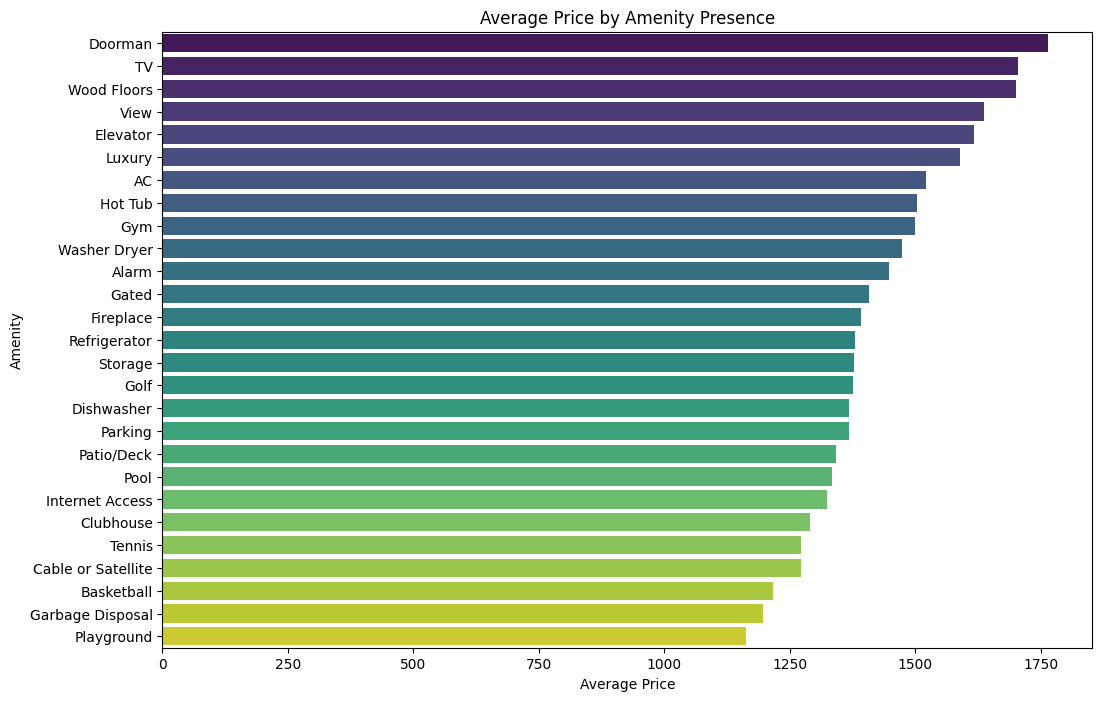

In [118]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
sns.barplot(x='price', y='amenity', data=average_price_by_amenity, hue='amenity', palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Average Price')
plt.ylabel('Amenity')
plt.title('Average Price by Amenity Presence')

# Show the plot
plt.show()


In the presented graph, a compelling relationship between listed amenities and the average price of rental listings emerges, providing valuable insights into the determinants of rental prices. Notably, certain amenities exhibit a clear association with higher average prices, reflecting the premium nature of these features often found in upscale apartments.

At the top of the price hierarchy, the inclusion of a doorman stands out as the most expensive amenity. This luxurious service is typically exclusive to higher-end residences, contributing to an elevated average price. Similarly, the presence of a TV, wood floors, a scenic view, and an elevator all align with higher prices, indicating a correlation with a more upscale and sophisticated living experience.

Conversely, amenities such as a playground, garbage disposal, tennis facilities, and internet access appear at the lower end of the price spectrum. While some of these features may not be considered luxurious, they nonetheless play a role in shaping rental prices. This observation suggests that certain amenities, though not necessarily opulent, can significantly influence the decision-making process for prospective renters.

Overall, this model underscores the intricate relationship between amenities and rental prices, shedding light on both expected features and sought-after luxuries. It provides valuable guidance for renters seeking specific attributes in their housing choice and landlords aiming to optimize the appeal and pricing of their listings based on the amenities offered.

# Conclusion

Through the extensive analysis and modeling conducted on the rental dataset, several key insights have been gleaned regarding the factors influencing rental prices. The exploration of geographic and non-geographic characteristics, alongside the examination of amenities, has provided a comprehensive understanding of the rental market.

Model Performance: The visualization comparing actual prices with predicted prices allows for a comprehensive evaluation of the model's accuracy. Deviations from the ideal prediction line provide valuable insights into areas where the model excels and areas for improvement.

Geographic Patterns: The geographical distribution of rental prices reveals distinct clusters of high and low-cost areas. Hotspots in California and major urban centers suggest a correlation between rent and economic activity, emphasizing the impact of local economies on housing costs.

Amenities and Price Relationship: The investigation into amenities highlights a nuanced relationship between specific features and rental prices. Luxurious amenities such as a doorman, wood floors, and scenic views are associated with higher prices, while others like playgrounds and internet access are linked to more affordable rentals.

